In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("reddit_wsb.csv", index_col=7)
df.head()

,title,score,id,url,comms_num,created,body
timestamp,,,,,,,
2021-01-28 21:37:41,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN
2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN
2021-01-28 21:30:35,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...
2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN
2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN


In [7]:
df_filtered = df[df["title"].str.contains("GME")]
df_filtered.shape

(8272, 7)

In [9]:
# Convert to timeseries
ts_dict = {}
for idx, row in df_filtered.iterrows():
    if ts_dict.get(idx, False):
        ts_dict[idx] += row.score
    else:
        ts_dict[idx] = row.score

ts_dict

{'2021-01-28 21:28:57': 29,
 '2021-01-28 21:26:56': 71,
 '2021-01-28 21:19:16': 200,
 '2021-01-28 21:17:28': 562,
 '2021-01-28 21:17:10': 0,
 '2021-01-28 21:15:58': 382,
 '2021-01-28 21:14:43': 240,
 '2021-01-28 20:59:57': 2739,
 '2021-01-28 20:48:16': 324,
 '2021-01-28 20:47:20': 606,
 '2021-01-28 20:46:58': 261,
 '2021-01-28 20:40:07': 223,
 '2021-01-28 20:31:19': 304,
 '2021-01-28 20:30:20': 365,
 '2021-01-28 20:18:32': 560,
 '2021-01-28 20:02:44': 207,
 '2021-01-28 20:01:05': 51,
 '2021-01-28 19:57:53': 235,
 '2021-01-28 19:52:17': 462,
 '2021-01-28 19:40:08': 12382,
 '2021-01-28 19:38:02': 739,
 '2021-01-28 19:19:36': 741,
 '2021-01-28 19:11:46': 318,
 '2021-01-28 19:00:16': 70,
 '2021-01-28 18:53:20': 2663,
 '2021-01-28 18:24:01': 81,
 '2021-01-28 17:54:14': 1260,
 '2021-01-28 17:12:39': 284,
 '2021-01-28 17:05:59': 167,
 '2021-01-28 17:02:07': 2663,
 '2021-01-28 17:02:02': 5507,
 '2021-01-28 16:33:01': 0,
 '2021-01-28 16:23:32': 775,
 '2021-01-28 16:23:53': 1677,
 '2021-01-28 16

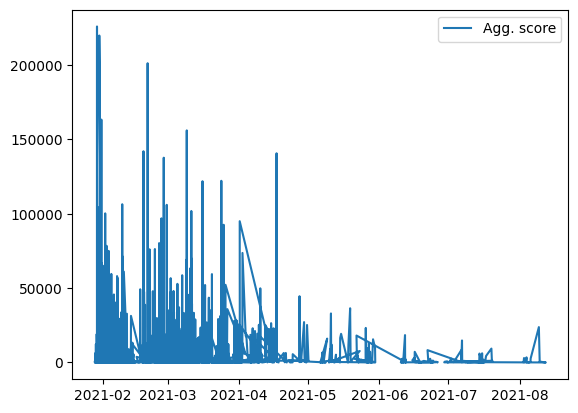

In [12]:
%matplotlib inline

# Prepare series
score = pd.Series(ts_dict)
score.index = pd.DatetimeIndex(score.index)

# Plotting
plt.plot(score, label="Agg. score")
plt.legend()
plt.show()